# Brain MRI Images for Brain Tumor Detection

data from [kaggle](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data)

## 資料集描述 : 
用於解決此問題的影像資料是用於腦腫瘤檢測的腦部 MRI 影像。 它由兩類 MRI 掃描組成
* 無腫瘤 (98張images)
* 有腫瘤 (155張images)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from tensorflow import keras 

## 對 target 做 One Hot Encoding :

In [2]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 1 - 有腫瘤
# 0 - 無腫瘤

OneHotEncoder()

## 建立 3 個清單:
* 數據列表，用於以 numpy 數組形式儲存圖像數據
* 路徑列表，用於儲存所有影像的路徑
* 用於儲存目標類別的一種熱編碼形式（無論是正常還是腫瘤）的結果列表

In [3]:
from PIL import Image

# 腫瘤影像的 result list

data = []
paths = []
result = []

for r, d, f in os.walk(r"C:/Users/user.DESKTOP-2LT8F45/kaggle_side_project/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [4]:
# 無腫瘤影像的 result list

paths = []
for r, d, f in os.walk(r"C:/Users/user.DESKTOP-2LT8F45/kaggle_side_project/Brain MRI Images for Brain Tumor Detection/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)
result

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

## 將資料拆分為訓練和測試 : 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

## Model : 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=1e-5),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

C:\Users\user.DESKTOP-2LT8F45\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 16, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/50
7/7 [==============================] - 3s 383ms/step - loss: 1.7735 - accuracy: 0.5315 - val_loss: 1.0817 - val_accuracy: 0.6429
Epoch 2/50
7/7 [==============================] - 2s 355ms/step - loss: 1.0729 - accuracy: 0.6847 - val_loss: 1.1803 - val_accuracy: 0.6071
Epoch 3/50
7/7 [==============================] - 2s 357ms/step - loss: 0.9315 - accuracy: 0.7297 - val_loss: 0.3531 - val_accuracy: 0.7857
Epoch 4/50
7/7 [==============================] - 3s 376ms/step - loss: 0.6271 - accuracy: 0.7658 - val_loss: 1.0279 - val_accuracy: 0.5357
Epoch 5/50
7/7 [==============================] - 3s 380ms/step - loss: 0.8626 - accuracy: 0.7297 - val_loss: 0.2461 - val_accuracy: 0.8571
Epoch 6/50
7/7 [==============================] - 3s 361ms/step - loss: 0.6165 - accuracy: 0.7928 - val_loss: 0.3039 - val_accuracy: 0.8214
Epoch 7/50
7/7 [==============================] - 3s 367ms/step - loss: 0.5320 - accuracy: 0.8559 - val_loss: 0.3442 - val_accuracy: 0.8214
Epoch 8/50
7/7 [====

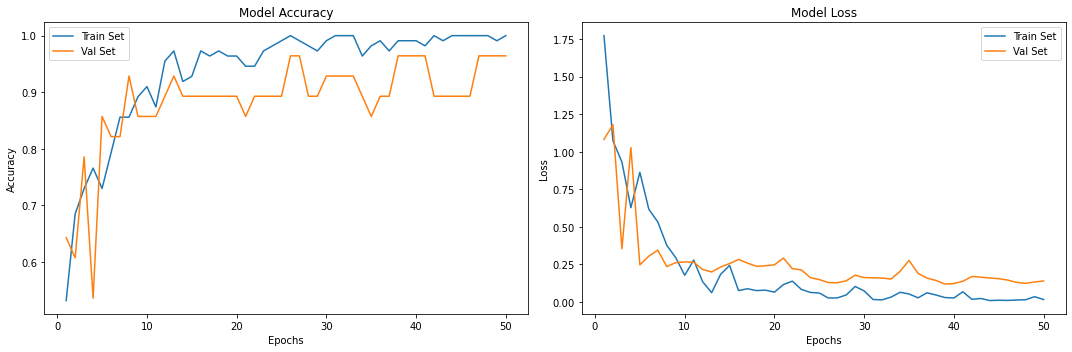

In [10]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.97        15

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



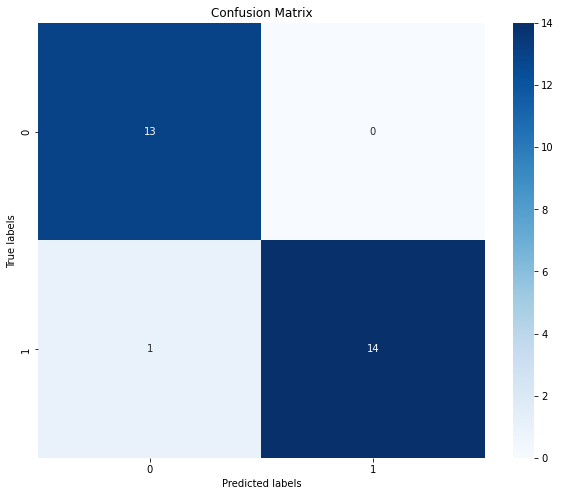

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# 對 test 進行 predict
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 分類報告
report = classification_report(true_labels, predicted_labels)

print(report)

# 混淆矩陣
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
def names(number):
    if number==1:
        return 'Tumor'
    else:
        return 'No Tumor'

In [15]:
# Save the model
model.save('Model.h5')

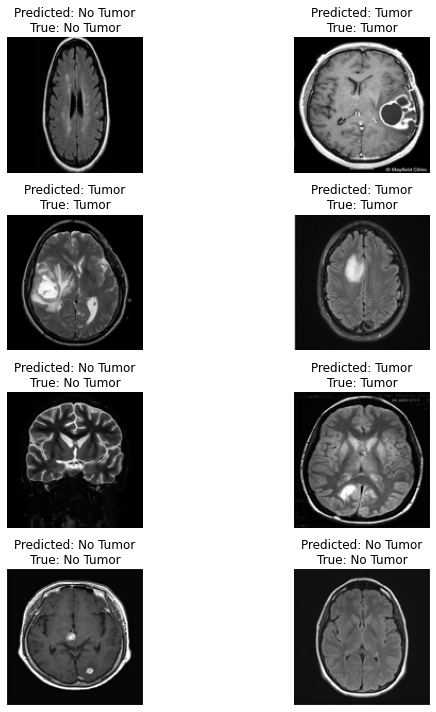

In [17]:
from PIL import Image
from matplotlib.pyplot import imshow


# 從 x_test 中隨機選擇四張圖片
random_indices = np.random.choice(len(x_test), size=8, replace=False)

# 建立子圖
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# 對每張影像進行預測並顯示
for i, idx in enumerate(random_indices):
    # 載入圖片
    img = Image.fromarray(x_test[idx])

    # 進行預測
    x = np.array(img.resize((128, 128)))
    x = x.reshape(1, 128, 128, 3)
    res = model.predict_on_batch(x)
    classification = np.argmax(res)
    prediction_label = names(classification)

    # 取得真實標籤
    true_label = names(np.argmax(y_test[idx]))

    # 顯示影像和預測結果
    row = i // 2
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Predicted: {prediction_label}\nTrue: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
